In [1]:
import gym
from gym import envs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download and build packages for visualization in jupyter
### git clone https://github.com/jakevdp/JSAnimation
### cd JSAnimation
### python3 setup.py install

In [2]:
# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    patch = plt.imshow(frames[0])
    plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=5)
    display(display_animation(anim, default_mode='loop'))

# List of Environment

In [3]:
envids = [spec.id for spec in envs.registry.all()]
for envid in sorted(envids):
    if envid in ["CartPole-v1","FrozenLake8x8-v0","PongDeterministic-v4"]:
        print(envid)

CartPole-v1
FrozenLake8x8-v0
PongDeterministic-v4


# FrozenLake

In [4]:
env = gym.make('FrozenLake8x8-v0')
env.reset()
render_flag = env.render(mode = 'rgb_array')


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


### State and Action Space

In [5]:
obs_space = env.observation_space
print('Observation space')
print(type(obs_space))
print("Total {} states".format(obs_space.n))
print()

act_space = env.action_space
print('Action space')
print(type(act_space))
print("Total {} actions".format(act_space.n))
print()

Observation space
<class 'gym.spaces.discrete.Discrete'>
Total 64 states

Action space
<class 'gym.spaces.discrete.Discrete'>
Total 4 actions



In [6]:
env.reset()
for t in range(10000):
    print('t = %d'%t)
    env.render(mode = 'rgb_array')
    print('')
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.render(mode = 'rgb_array')
env.close()

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF

### Transition Probability

In [7]:
P = env.unwrapped.P
# P(s'|s,a)
print('State:')
print(type(P))
print(P.keys())
print()

print('Action:')
print(P[0].keys())
print(P[0][0])
print()

print('Prob, Next state, Reward, Done:')
print(P[0][0][0])

State:
<class 'dict'>
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

Action:
dict_keys([0, 1, 2, 3])
[(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 8, 0.0, False)]

Prob, Next state, Reward, Done:
(0.3333333333333333, 0, 0.0, False)


In [8]:
for s in P.keys():
    for a in P[s].keys():
        for next_s_info in P[s][a]:
            print('P(s\':{}|s:{},a:{}) = {:.2}, Reward:{}'.format(next_s_info[1],s,a,next_s_info[0],next_s_info[2]))

P(s':0|s:0,a:0) = 0.33, Reward:0.0
P(s':0|s:0,a:0) = 0.33, Reward:0.0
P(s':8|s:0,a:0) = 0.33, Reward:0.0
P(s':0|s:0,a:1) = 0.33, Reward:0.0
P(s':8|s:0,a:1) = 0.33, Reward:0.0
P(s':1|s:0,a:1) = 0.33, Reward:0.0
P(s':8|s:0,a:2) = 0.33, Reward:0.0
P(s':1|s:0,a:2) = 0.33, Reward:0.0
P(s':0|s:0,a:2) = 0.33, Reward:0.0
P(s':1|s:0,a:3) = 0.33, Reward:0.0
P(s':0|s:0,a:3) = 0.33, Reward:0.0
P(s':0|s:0,a:3) = 0.33, Reward:0.0
P(s':1|s:1,a:0) = 0.33, Reward:0.0
P(s':0|s:1,a:0) = 0.33, Reward:0.0
P(s':9|s:1,a:0) = 0.33, Reward:0.0
P(s':0|s:1,a:1) = 0.33, Reward:0.0
P(s':9|s:1,a:1) = 0.33, Reward:0.0
P(s':2|s:1,a:1) = 0.33, Reward:0.0
P(s':9|s:1,a:2) = 0.33, Reward:0.0
P(s':2|s:1,a:2) = 0.33, Reward:0.0
P(s':1|s:1,a:2) = 0.33, Reward:0.0
P(s':2|s:1,a:3) = 0.33, Reward:0.0
P(s':1|s:1,a:3) = 0.33, Reward:0.0
P(s':0|s:1,a:3) = 0.33, Reward:0.0
P(s':2|s:2,a:0) = 0.33, Reward:0.0
P(s':1|s:2,a:0) = 0.33, Reward:0.0
P(s':10|s:2,a:0) = 0.33, Reward:0.0
P(s':1|s:2,a:1) = 0.33, Reward:0.0
P(s':10|s:2,a:1) = 

# CartPole

In [9]:
env = gym.make('CartPole-v1')
obs = env.reset()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [10]:
obs_space = env.observation_space
print('Observation space')
print(type(obs_space))
print(obs_space.shape)
print("Dimension:{}".format(obs_space.shape[0]))
print("High: {}".format(obs_space.high))
print("Low: {}".format(obs_space.low))
print()

act_space = env.action_space
print('Action space')
print(type(act_space))
print("Total {} actions".format(act_space.n))
print()

Observation space
<class 'gym.spaces.box.Box'>
(4,)
Dimension:4
High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]

Action space
<class 'gym.spaces.discrete.Discrete'>
Total 2 actions




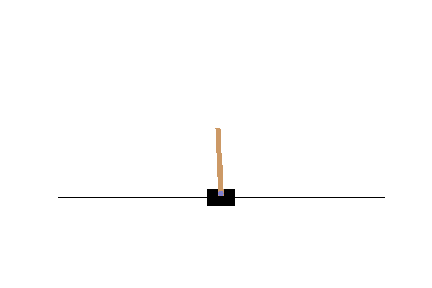
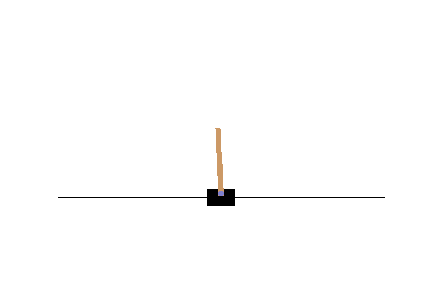
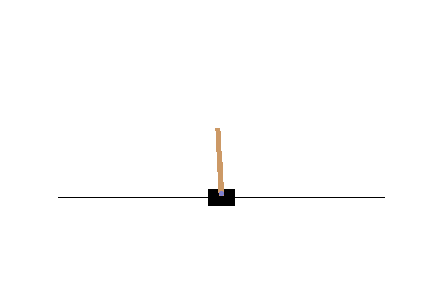
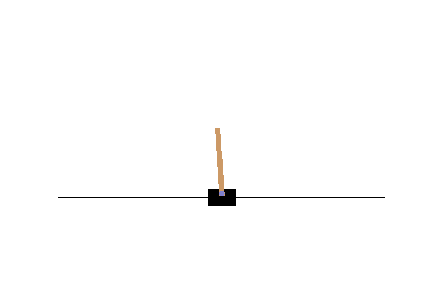
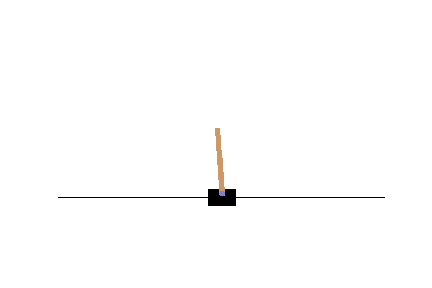
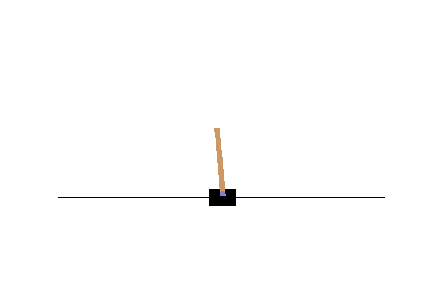
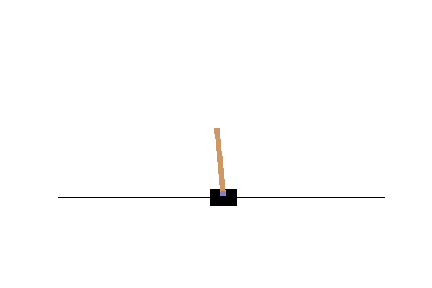
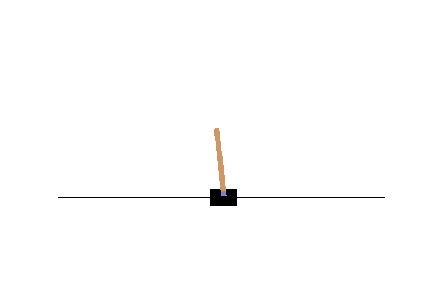
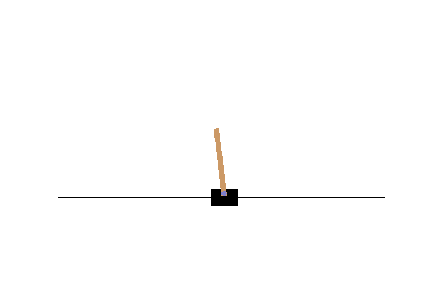
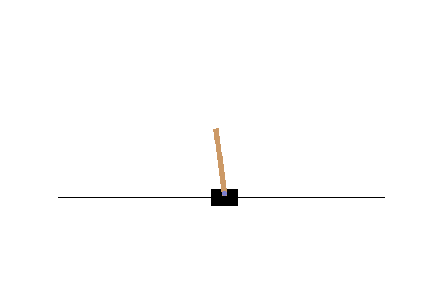
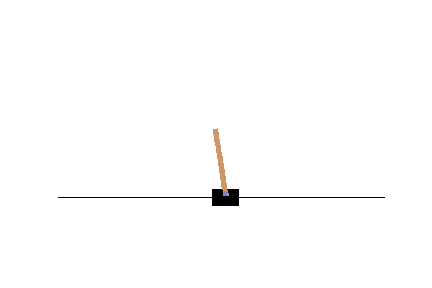
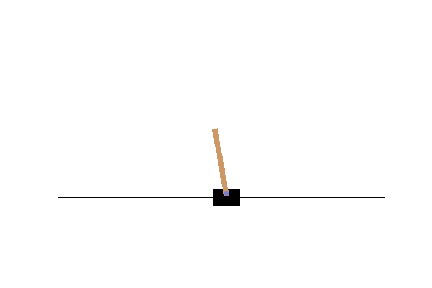
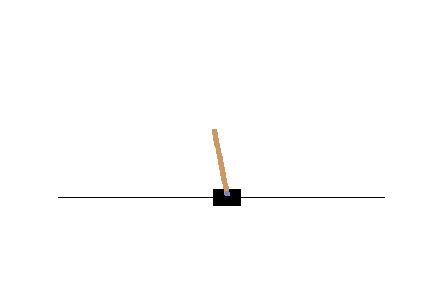

In [11]:
env.reset()
cum_reward = 0
frames = []
for t in range(10000):
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()
display_frames_as_gif(frames)